In [1]:
# 날짜: 05/30 작성자: 송승민 작성목적: 결측치 확인, 데이터 전처리 & 데이터 셋 생성 & 시각화
# 주제 세대 별 구매금액 및 구매상품종류 분석

In [2]:
# 필요한 패키지들 import작업
import pandas as pd
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# csv데이터 파일 가져오기
customer = pd.read_csv("customer.csv")
sales = pd.read_csv("sales.csv")
store = pd.read_csv("store.csv")

In [4]:
# null값 확인
print(customer.isnull().sum())
print(sales.isnull().sum())
print(store.isnull().sum())

# 데이터크기 확인
print(customer.shape)
print(sales.shape)
print(store.shape)

고객ID     0
성별       0
연령       0
거주지역    15
dtype: int64
고객ID      0
거래식별ID    0
점포ID      0
거래일자      0
거래시간대     0
상품대분류명    0
상품중분류명    0
구매건수      0
구매금액      0
dtype: int64
고객ID     0
가맹점ID    0
거래일자     0
구매금액     0
적립포인트    0
사용포인트    0
dtype: int64
(5000, 4)
(57198, 9)
(26044, 6)


In [5]:
customer = customer.fillna('없음')
print(customer.isnull().sum())

고객ID    0
성별      0
연령      0
거주지역    0
dtype: int64


In [6]:
merger_csales = pd.merge(customer, sales, on='고객ID', how='inner')
merger_csales['연령대'] = (merger_csales['연령']//10) * 10
merger_csales

,고객ID,성별,연령,거주지역,거래식별ID,점포ID,거래일자,거래시간대,상품대분류명,상품중분류명,구매건수,구매금액,연령대
0,Q05910452,F,29,서울 서초구 서초4동,A027152,BB,20140408,20,야채,두채류,1,4590,20
1,Q05910452,F,29,서울 서초구 서초4동,A027373,BB,20140414,20,청과,건과,1,2585,20
2,Q05910452,F,29,서울 서초구 서초4동,A027620,BB,20140420,19,야채,근채류,1,1990,20
3,Q05910452,F,29,서울 서초구 서초4동,A027895,BB,20140428,13,음주류,음료,1,590,20
4,Q05910452,F,29,서울 서초구 서초4동,A027942,BB,20140429,19,야채,두채류,1,3450,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57193,Q34149506,F,51,경북 경주시 동천동,A057632,DD,20140724,19,음주류,주류,8,12430,50
57194,Q34149506,F,51,경북 경주시 동천동,A057632,DD,20140724,19,일반식품,즉석식품,2,3980,50
57195,Q34149506,F,51,경북 경주시 동천동,A058315,DD,20140801,20,음주류,기타음주류,1,40,50
57196,Q34149506,F,51,경북 경주시 동천동,A058315,DD,20140801,20,음주류,음료,1,820,50


In [7]:
# 연령대 확인
merger_csales['연령대'].describe()
# 70대가 최고 연령대임을 확인

count    57198.000000
mean        42.006888
std         12.301702
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         70.000000
Name: 연령대, dtype: float64

In [8]:
# 연령대 별 구매금액(합계, 평균, 거래건수)
csales_age_sum = merger_csales.groupby('연령대').구매금액.sum().reset_index()
csales_age_avg = merger_csales.groupby('연령대').구매금액.mean().reset_index()
# 거래건수
csales_age_cnt = merger_csales.groupby('연령대').구매건수.count().reset_index()
# 전체 상품 품목 거래건수
csales_good_cnt = merger_csales.groupby('상품대분류명').구매건수.count().reset_index()
csales_age_sum
csales_age_avg
csales_age_cnt
csales_good_cnt

,상품대분류명,구매건수
0,곡물,768
1,낙농,6043
2,냉동,1597
3,냉장,2969
4,델리카,2523
5,면과자,7190
6,수산,2684
7,야채,11758
8,음주류,5280
9,일반식품,2795


In [9]:
# 10살 단위로 고객들 분류
csales_20 = merger_csales[merger_csales['연령대'].isin([20])]
csales_30 = merger_csales[merger_csales['연령대'].isin([30])]
csales_40 = merger_csales[merger_csales['연령대'].isin([40])]
csales_50 = merger_csales[merger_csales['연령대'].isin([50])]
csales_60 = merger_csales[merger_csales['연령대'].isin([60])]
csales_70 = merger_csales[merger_csales['연령대'].isin([70])]

In [10]:
csales_20.groupby('상품대분류명').상품대분류명.count()

상품대분류명
곡물       33
낙농      457
냉동      122
냉장      179
델리카     234
면과자     677
수산      140
야채      813
음주류     560
일반식품    258
일상용품    304
조미료류    195
청과      331
축산      141
Name: 상품대분류명, dtype: int64

In [11]:
vege_20 = csales_20[csales_20['상품대분류명'] == '야채']
snack_20 = csales_20[csales_20['상품대분류명'] == '면과자']
alcohol_20 = csales_20[csales_20['상품대분류명'] == '음주류']
grain_20 = csales_20[csales_20['상품대분류명'] == '곡물']
freeze_20 = csales_20[csales_20['상품대분류명'] == '냉동']
fish_20 = csales_20[csales_20['상품대분류명'] == '수산']

vege_20['구매금액'].describe()
snack_20['구매금액'].describe()
#alcohol_20['구매금액']describe()
#grain_20['구매금액']describe()
#freeze_20['구매금액']describe()ㅠ
#fish_20['구매금액']describe()

count      677.000000
mean      2391.187592
std       1670.554245
min        150.000000
25%       1050.000000
50%       2000.000000
75%       3050.000000
max      15840.000000
Name: 구매금액, dtype: float64

In [12]:
print(vege_20['구매금액'].mean())
print(snack_20['구매금액'].mean())
print(alcohol_20['구매금액'].mean())
print(grain_20['구매금액'].mean())
print(freeze_20['구매금액'].mean())
print(fish_20['구매금액'].mean())

2443.1955719557195
2391.1875923190546
2963.625
18320.848484848484
3830.622950819672
6569.371428571429


In [13]:
csales_20_price = csales_20.groupby('거래식별ID').구매금액.mean().reset_index()
csales_30_price = csales_30.groupby('거래식별ID').구매금액.mean().reset_index()
csales_40_price = csales_40.groupby('거래식별ID').구매금액.mean().reset_index()

<Figure size 800x800 with 0 Axes>

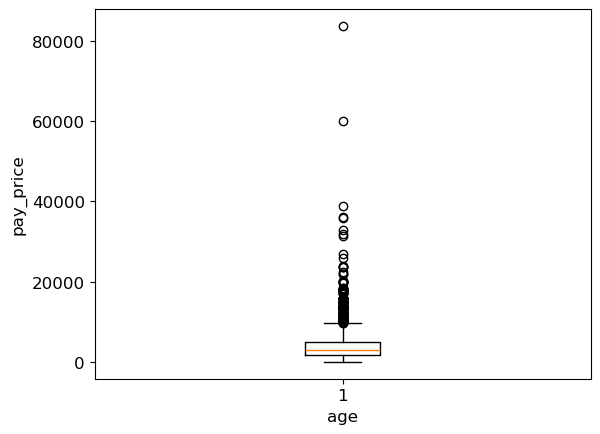

In [14]:
# 20대 고객의 한 번 거래당 구매금액의 박스모양

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.size'] = 12

a = csales_20_price.구매금액
b = csales_30_price.구매금액
c = csales_40_price.구매금액

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.boxplot([a])
ax.set_xlabel('age')
ax.set_ylabel('pay_price')

plt.show()

In [15]:
# 20대 구매금액 정렬
csales_20_price_sort = csales_20_price.sort_values(by='구매금액',ascending=True).reset_index(drop=True)
csales_20_price_sort

,거래식별ID,구매금액
0,A008793,40.0
1,A010497,40.0
2,A018989,40.0
3,A022091,50.0
4,A055250,50.0
...,...,...
2873,A060606,35850.0
2874,A045892,36200.0
2875,A001868,38900.0
2876,A061167,60000.0


In [16]:
csales_20_price_sort

# 이상치 제거

csales_20_noraml = csales_20_price_sort[csales_20_price_sort['구매금액'] <= 10000]
csales_20_adnomral = csales_20_price_sort[csales_20_price_sort['구매금액'] >= 8000]
csales_20_noraml

,거래식별ID,구매금액
0,A008793,40.0
1,A010497,40.0
2,A018989,40.0
3,A022091,50.0
4,A055250,50.0
...,...,...
2732,A058856,10000.0
2733,A029096,10000.0
2734,A014808,10000.0
2735,A039212,10000.0


In [17]:
csales_20_adnomral

,거래식별ID,구매금액
2621,A024646,8000.0
2622,A010314,8000.0
2623,A013889,8000.0
2624,A045540,8000.0
2625,A028135,8000.0
...,...,...
2873,A060606,35850.0
2874,A045892,36200.0
2875,A001868,38900.0
2876,A061167,60000.0


<Figure size 800x800 with 0 Axes>

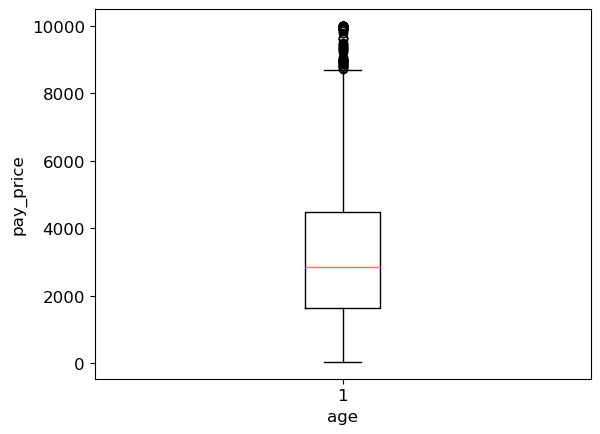

In [18]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.size'] = 12

a = csales_20_noraml['구매금액']


plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

ax.boxplot([a])
ax.set_xlabel('age')
ax.set_ylabel('pay_price')

plt.show()

In [112]:
# csales_20
# 1. 음주류 또는 면과자를 구매하는 고객이 음주류도  같이 구매하는가
# 2. 구매한다면 같이 구매하는가? 아니라면 어떤 음주류를 구매하는 고객들이 하나만 사는지 다른 제품도 사는지 확인
# 3. 야채류를 구매하는 고객들은 다른 제품도 구매하는지? 야채류를 구매하는 고객들의 특징은 무엇인지?


cust_al = csales_20[csales_20['상품대분류명'] == '음주류']

cust_al_lis = cust_al['고객ID']
sale_al_lis = cust_al['거래식별ID']

cust_al_list = csales_20[csales_20['고객ID'].isin(cust_al_lis)]
sale_al_list = csales_20[csales_20['거래식별ID'].isin(sale_al_lis)]

#cust_al_list.groupby('거래식별ID').상품대분류명.sum().reset_index()


# 음주류를 구매하는 거래별 테이블
#sale_al_list

# 음주류에는 음료 주류 기타음주류가 있으며, 음료, 주류, 기타음주류로 순서가 나뉨
#csales_20[csales_20['상품대분류명'] == '음주류'].상품중분류명.value_counts()
# 음료       350
# 주류       185
# 기타음주류     25

# 면과자, 야채, 낙농 순으로 제품을 많이 구매함
sale_al_list['상품대분류명'].value_counts()


cust_ve2[cust_ve2['상품대분류명'] == '음주류'].상품중분류명.value_counts()
sale_al_list[sale_al_list['상품대분류명'] == '야채'].상품중분류명.value_counts()

상품중분류명
근채류      19
과채류      15
두채류      11
엽채류       9
양채류       8
버섯류       7
계란류       6
기타야채      2
김치채소류     2
Name: count, dtype: int64

In [44]:
for saleId, indexs in df_g:
    print(saleId)
    print(indexs['상품대분류명'])
    print()

A000017
15351    면과자
Name: 상품대분류명, dtype: object

A000036
10254    야채
Name: 상품대분류명, dtype: object

A000055
30245    음주류
Name: 상품대분류명, dtype: object

A000112
7568    면과자
Name: 상품대분류명, dtype: object

A000130
54212    야채
Name: 상품대분류명, dtype: object

A000139
31260    면과자
31261     축산
Name: 상품대분류명, dtype: object

A000161
34192    청과
Name: 상품대분류명, dtype: object

A000204
3538    음주류
Name: 상품대분류명, dtype: object

A000317
6693    축산
Name: 상품대분류명, dtype: object

A000318
48815    낙농
Name: 상품대분류명, dtype: object

A000372
19314    수산
Name: 상품대분류명, dtype: object

A000487
19512    일상용품
Name: 상품대분류명, dtype: object

A000522
56996    일상용품
Name: 상품대분류명, dtype: object

A000527
47696    음주류
Name: 상품대분류명, dtype: object

A000576
51087    야채
Name: 상품대분류명, dtype: object

A000588
16892    야채
Name: 상품대분류명, dtype: object

A000599
10332    조미료류
Name: 상품대분류명, dtype: object

A000636
30246    음주류
Name: 상품대분류명, dtype: object

A000732
17908      곡물
17909      야채
17910    일상용품
Name: 상품대분류명, dtype: object

A000736
759     

In [102]:
cust_ve = cust_al_list[cust_al_list['상품대분류명'] == '야채'].거래식별ID
cust_ve2 = cust_al_list[cust_al_list['거래식별ID'].isin(cust_ve)]
#cust_al_list.groupby('거래식별ID').상품대분류명.sum().reset_index()
cust_ve2['상품대분류명'].value_counts()
cust_ve2[cust_ve2['상품대분류명'] == '음주류'].상품중분류명.value_counts()
# cust_al_list.groupby('거래식별ID').상품대분류명.count

상품중분류명
음료       38
주류       23
기타음주류     3
Name: count, dtype: int64

In [107]:
cust_ve = sale_al_list[sale_al_list['상품대분류명'] == '야채'].거래식별ID
cust_ve2 = sale_al_list[sale_al_list['거래식별ID'].isin(cust_ve)]
#cust_al_list.groupby('거래식별ID').상품대분류명.sum().reset_index()
cust_ve2['상품대분류명'].value_counts()
# cust_ve2[cust_ve2['상품대분류명'] == '음주류'].상품중분류명.value_counts()
# cust_al_list.groupby('거래식별ID').상품대분류명.count

상품대분류명
야채      79
음주류     64
면과자     15
냉장       8
일반식품     8
청과       7
낙농       6
델리카      5
조미료류     5
일상용품     4
수산       3
축산       3
곡물       2
냉동       1
Name: count, dtype: int64

In [115]:
csales_20.groupby('거래식별ID').상품대분류명.sum()

거래식별ID
A000017    면과자
A000036     야채
A000055    음주류
A000112    면과자
A000128    델리카
          ... 
A063614    면과자
A063630     축산
A063633     낙농
A063644     낙농
A063661     야채
Name: 상품대분류명, Length: 2878, dtype: object

In [317]:
# 거래식별ID 명단 추리기
veals = csales_20[csales_20['상품대분류명'].isin(['야채','음주류'])].거래식별ID
snals = csales_20[csales_20['상품대분류명'].isin(['면과자','음주류'])].거래식별ID

In [318]:
# 명단을 통해 다시 데이터프레임에 조건부로 적용시킨 테이블
veal2 = csales_20[csales_20['거래식별ID'].isin(veals)]
snal2 = csales_20[csales_20['거래식별ID'].isin(snals)]

In [319]:
veal3 = []
for veal in veals:
    if '야채' in veal2[veal2['거래식별ID']==veal].상품대분류명.tolist():
        if'음주류' in veal2[veal2['거래식별ID']==veal].상품대분류명.tolist():
            veal3.append(veal)

In [320]:
snal3 = []
for snal in snals:
    if '면과자' in veal2[veal2['거래식별ID']==snal].상품대분류명.tolist():
        if'음주류' in veal2[veal2['거래식별ID']==snal].상품대분류명.tolist():
            snal3.append(snal)

In [321]:
# 0 또는 1 부여하기
for veall in veal3:
    veal2.loc[veal2['거래식별ID']==veall,'동시구매'] = 1


C:\Users\tmdal\AppData\Local\Temp\ipykernel_13248\4148600616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veal2.loc[veal2['거래식별ID']==veall,'동시구매'] = 1


In [322]:
# 0 또는 1 부여하기
for snall in snal3:
    snal2.loc[snal2['거래식별ID']==snall,'동시구매'] = 1

C:\Users\tmdal\AppData\Local\Temp\ipykernel_13248\1309182492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snal2.loc[snal2['거래식별ID']==snall,'동시구매'] = 1


In [330]:
snal2 = snal2.fillna(0)

In [329]:
veal2 = veal2.fillna(0)

In [381]:
snal2['상품대분류명'].unique()
#snal2['상품대분류명'].unique()

array(['음주류', '야채', '면과자', '일상용품', '일반식품', '냉동', '델리카', '청과', '축산', '낙농',
       '조미료류', '냉장', '수산', '곡물'], dtype=object)

In [375]:
# veal7 = veal2.loc[~(veal2['상품대분류명'] == '낙농')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '냉장')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '곡물')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '수산')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '냉동')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '델리카')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '청과')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '조미료류')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '일반식품')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '축산')]
# veal7 = veal7.loc[~(veal7['상품대분류명'] == '일상용품')]

In [382]:
snal7 = snal2.loc[~(snal2['상품대분류명'] == '일상용품')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '일반식품')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '냉동')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '델리카')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '청과')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '축산')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '낙농')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '조미료류')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '냉장')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '수산')]
snal7 = snal7.loc[~(snal7['상품대분류명'] == '곡물')]

In [383]:
snal7['상품대분류명'].unique()

array(['음주류', '야채', '면과자'], dtype=object)

In [ ]:
veal2
snal2

In [240]:
len(veal3)

143

In [377]:
logics1 = sm.Logit.from_formula('동시구매~상품대분류명',data=veal7).fit()

Optimization terminated successfully.
         Current function value: 0.330918
         Iterations 6


In [378]:
logics1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   동시구매   No. Observations:                 1536
Model:                          Logit   Df Residuals:                     1533
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                0.001249
Time:                        17:08:22   Log-Likelihood:                -508.29
converged:                       True   LL-Null:                       -508.93
Covariance Type:            nonrobust   LLR p-value:                    0.5295
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2892      0.271     -8.448      0.000      -2.820      -1.758
상품대분류명[T.야채]      0.0601      0.296      0.203      0.839      -0.519       0.640
상품대분류명[T.음주류]     0.2415      0.302      0.800      0.424      -0.350       0.833
=================================================================================
"""

In [384]:
logics2 = sm.Logit.from_formula('동시구매~상품대분류명',data=snal7).fit()

Optimization terminated successfully.
         Current function value: 0.419562
         Iterations 6


In [385]:
logics2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   동시구매   No. Observations:                 1388
Model:                          Logit   Df Residuals:                     1385
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                0.006857
Time:                        17:11:10   Log-Likelihood:                -582.35
converged:                       True   LL-Null:                       -586.37
Covariance Type:            nonrobust   LLR p-value:                   0.01794
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7179      0.107    -16.054      0.000      -1.928      -1.508
상품대분류명[T.야채]     -0.7317      0.319     -2.291      0.022      -1.358      -0.106
상품대분류명[T.음주류]     0.1042      0.156      0.668      0.504      -0.202       0.410
=================================================================================
"""